# Using Keras

Notes: https://github.com/daviskregers/notes/blob/master/data-science/10-deep-learning-and-neural-networks/06-using-keras.md

---
Keras is a higher-level API within tesorflow that makes things a lot easier.

We'll set up the same deep neural network to learn from MNIST dataset, but with keras.

In [2]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [3]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

We need to explicitly convert the data into the format Keras / Tensorflow expects. We divide the image data by 255 in order to normalize it into 0-1 range, after converting it into floating point values.

In [4]:
train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

Now we'll convert the 0-9 labels into "one-hot" format.

So the training label data is a tensor of shape (60 000, 10).

In [5]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

Let's take a peek at one of the training images just to make sure it looks OK.

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


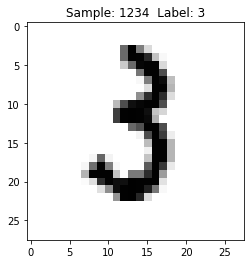

In [6]:
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels[num])  
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)

All the code we wrote in tensorflow creating placeholders, variables and defining a bunch of linear algebra for each layer in our neural network - none of that is necessary with keras.

We can set up the same layers like this. The input layer of 784 features nfeeds into a ReLU layer of 512 nodes, which then goes into 10 nodes with softmax applied.

In [7]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

We can get a nice description of the resulting mode.

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Setting up our optimizer and loss function is just as simple. We will use the RMSProp optimizer here. Other choices include Adagrad, SGD, Adam, Adamax, and Nadam. See https://keras.io/optimizers/

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Training our model is also just one line of code with keras. Here we'll do 10 epochs with a batch of size 100. Keras is slower, and if we're not running on top of a GPU-accelerated tensorflow this can take a fair amount of time.

In [11]:
history = model.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Epoch 1/10
600/600 - 1s - loss: 0.2428 - accuracy: 0.9291 - val_loss: 0.1200 - val_accuracy: 0.9620
Epoch 2/10
600/600 - 1s - loss: 0.0976 - accuracy: 0.9710 - val_loss: 0.0843 - val_accuracy: 0.9742
Epoch 3/10
600/600 - 1s - loss: 0.0651 - accuracy: 0.9802 - val_loss: 0.0721 - val_accuracy: 0.9777
Epoch 4/10
600/600 - 1s - loss: 0.0478 - accuracy: 0.9855 - val_loss: 0.0707 - val_accuracy: 0.9783
Epoch 5/10
600/600 - 1s - loss: 0.0355 - accuracy: 0.9892 - val_loss: 0.0696 - val_accuracy: 0.9805
Epoch 6/10
600/600 - 1s - loss: 0.0277 - accuracy: 0.9919 - val_loss: 0.0706 - val_accuracy: 0.9800
Epoch 7/10
600/600 - 1s - loss: 0.0218 - accuracy: 0.9935 - val_loss: 0.0757 - val_accuracy: 0.9791
Epoch 8/10
600/600 - 1s - loss: 0.0164 - accuracy: 0.9954 - val_loss: 0.0690 - val_accuracy: 0.9814
Epoch 9/10
600/600 - 1s - loss: 0.0127 - accuracy: 0.9962 - val_loss: 0.0748 - val_accuracy: 0.9800
Epoch 10/10
600/600 - 1s - loss: 0.0100 - accuracy: 0.9974 - val_loss: 0.0687 - val_accuracy: 0.9836

But, event with just 10 epochs, we've outperformed our tensorflow version considerably.

In [12]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06866224110126495
Test accuracy: 0.9836000204086304


As before let's visualize the ones it got wrong. As this model is much better, we'll have to search deeper to find mistakes to look at.

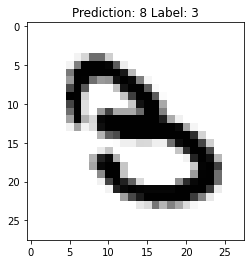

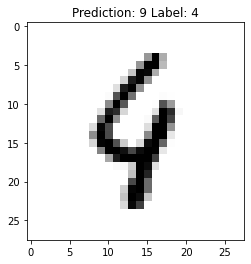

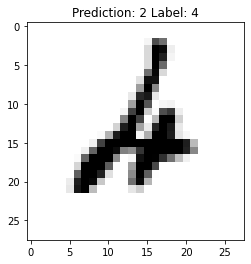

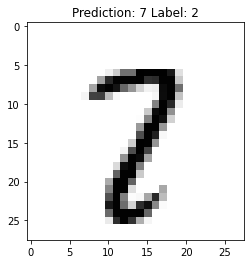

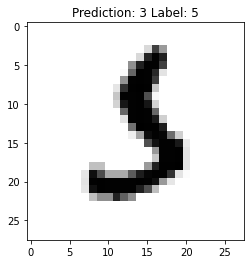

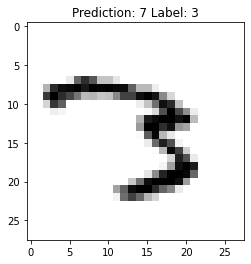

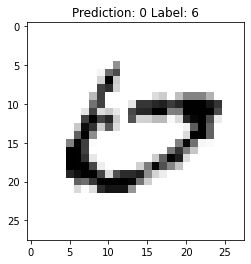

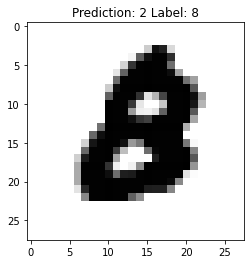

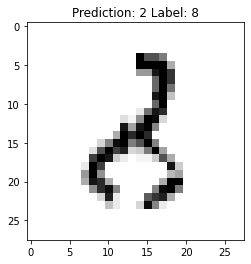

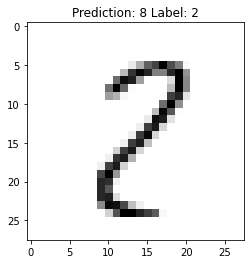

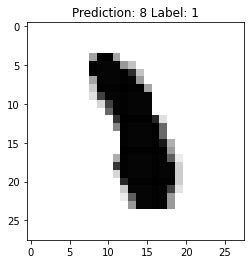

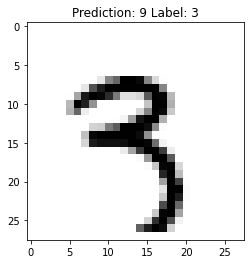

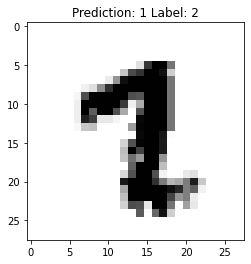

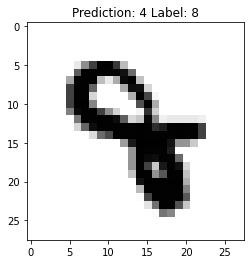

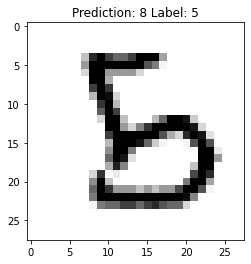

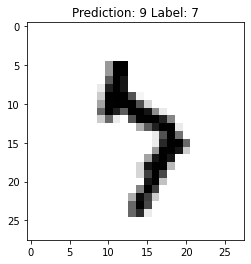

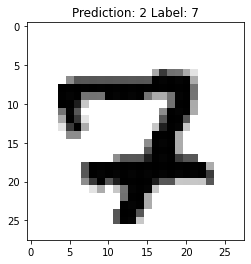

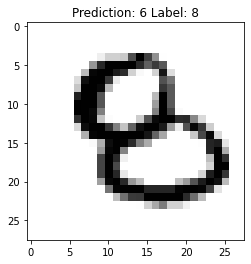

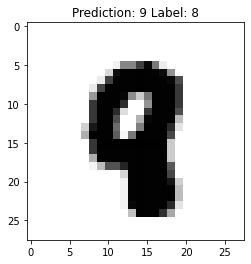

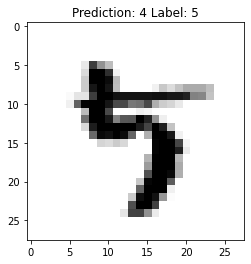

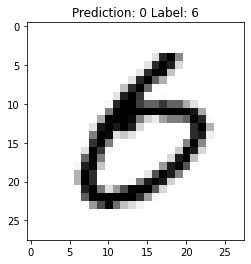

In [13]:
for x in range(1000):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()

You can see most of the ones it's having trouble with, are images a human would have trouble as well!

---

We can see if we can improve the results by running more epochs, trying different optimizers.

We can also try adding additional layers and use dropout at each step to prevent overfitting.

In [26]:
model2 = Sequential()
model2.add(Dense(512, activation='relu', input_shape=(784,)))
model2.add(Dropout(0.2))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model2.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Epoch 1/10
600/600 - 2s - loss: 0.2380 - accuracy: 0.9281 - val_loss: 0.1105 - val_accuracy: 0.9650
Epoch 2/10
600/600 - 1s - loss: 0.1018 - accuracy: 0.9689 - val_loss: 0.0826 - val_accuracy: 0.9754
Epoch 3/10
600/600 - 1s - loss: 0.0768 - accuracy: 0.9769 - val_loss: 0.0770 - val_accuracy: 0.9783
Epoch 4/10
600/600 - 2s - loss: 0.0629 - accuracy: 0.9815 - val_loss: 0.0844 - val_accuracy: 0.9773
Epoch 5/10
600/600 - 1s - loss: 0.0537 - accuracy: 0.9848 - val_loss: 0.0784 - val_accuracy: 0.9797
Epoch 6/10
600/600 - 2s - loss: 0.0489 - accuracy: 0.9860 - val_loss: 0.0738 - val_accuracy: 0.9814
Epoch 7/10
600/600 - 2s - loss: 0.0411 - accuracy: 0.9884 - val_loss: 0.0896 - val_accuracy: 0.9806
Epoch 8/10
600/600 - 1s - loss: 0.0403 - accuracy: 0.9887 - val_loss: 0.0913 - val_accuracy: 0.9811
Epoch 9/10
600/600 - 2s - loss: 0.0361 - accuracy: 0.9896 - val_loss: 0.0841 - val_accuracy: 0.9842
Epoch 10/10
600/600 - 2s - loss: 0.0330 - accuracy: 0.9905 - val_loss: 0.1196 - val_accuracy: 0.9782

In [27]:
score = model2.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11958785355091095
Test accuracy: 0.9782000184059143


In [24]:
from tensorflow.keras.optimizers import Adam

model3 = Sequential()
model3.add(Dense(512, activation='relu', input_shape=(784,)))
model3.add(Dropout(0.2))
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(10, activation='softmax'))

model3.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model3.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Epoch 1/10
600/600 - 1s - loss: 0.2399 - accuracy: 0.9270 - val_loss: 0.1065 - val_accuracy: 0.9661
Epoch 2/10
600/600 - 1s - loss: 0.0981 - accuracy: 0.9689 - val_loss: 0.0842 - val_accuracy: 0.9722
Epoch 3/10
600/600 - 1s - loss: 0.0742 - accuracy: 0.9769 - val_loss: 0.0678 - val_accuracy: 0.9793
Epoch 4/10
600/600 - 1s - loss: 0.0561 - accuracy: 0.9819 - val_loss: 0.0634 - val_accuracy: 0.9808
Epoch 5/10
600/600 - 1s - loss: 0.0462 - accuracy: 0.9847 - val_loss: 0.0727 - val_accuracy: 0.9790
Epoch 6/10
600/600 - 1s - loss: 0.0395 - accuracy: 0.9873 - val_loss: 0.0671 - val_accuracy: 0.9803
Epoch 7/10
600/600 - 1s - loss: 0.0354 - accuracy: 0.9879 - val_loss: 0.0731 - val_accuracy: 0.9790
Epoch 8/10
600/600 - 1s - loss: 0.0319 - accuracy: 0.9900 - val_loss: 0.0619 - val_accuracy: 0.9827
Epoch 9/10
600/600 - 1s - loss: 0.0313 - accuracy: 0.9894 - val_loss: 0.0696 - val_accuracy: 0.9812
Epoch 10/10
600/600 - 1s - loss: 0.0263 - accuracy: 0.9913 - val_loss: 0.0803 - val_accuracy: 0.9782

In [25]:
score = model3.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08029841631650925
Test accuracy: 0.9782000184059143


In [21]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

earlystopping = EarlyStopping(monitor='loss', patience=3)

model4 = Sequential()
model4.add(Dense(512, activation='relu', input_shape=(784,)))
model4.add(Dropout(0.2))
model4.add(Dense(512, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(10, activation='softmax'))

model4.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model4.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=100,
                    verbose=2,
                    callbacks=[earlystopping],
                    validation_data=(test_images, test_labels))

Epoch 1/100
600/600 - 1s - loss: 0.2412 - accuracy: 0.9263 - val_loss: 0.1055 - val_accuracy: 0.9669
Epoch 2/100
600/600 - 1s - loss: 0.1003 - accuracy: 0.9692 - val_loss: 0.0897 - val_accuracy: 0.9724
Epoch 3/100
600/600 - 1s - loss: 0.0723 - accuracy: 0.9771 - val_loss: 0.0813 - val_accuracy: 0.9757
Epoch 4/100
600/600 - 1s - loss: 0.0572 - accuracy: 0.9817 - val_loss: 0.0768 - val_accuracy: 0.9750
Epoch 5/100
600/600 - 1s - loss: 0.0459 - accuracy: 0.9857 - val_loss: 0.0723 - val_accuracy: 0.9803
Epoch 6/100
600/600 - 1s - loss: 0.0413 - accuracy: 0.9865 - val_loss: 0.0722 - val_accuracy: 0.9788
Epoch 7/100
600/600 - 1s - loss: 0.0367 - accuracy: 0.9879 - val_loss: 0.0611 - val_accuracy: 0.9829
Epoch 8/100
600/600 - 1s - loss: 0.0308 - accuracy: 0.9901 - val_loss: 0.0686 - val_accuracy: 0.9809
Epoch 9/100
600/600 - 1s - loss: 0.0289 - accuracy: 0.9905 - val_loss: 0.0813 - val_accuracy: 0.9772
Epoch 10/100
600/600 - 1s - loss: 0.0257 - accuracy: 0.9914 - val_loss: 0.0769 - val_accura

In [23]:
score = model4.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09880384057760239
Test accuracy: 0.9833999872207642
